In [13]:
import os, math
from IPython.display import Image
import numpy as np
seed = np.random.seed
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

In [15]:
df = pd.read_csv('all_stocks_5yr.csv')

In [17]:
df = df[df['Name'] == 'ZTS']
X_main = df[['open', 'high', 'low', 'close']]

In [19]:
df = df.drop(columns=['date', 'Name', 'volume'])

In [21]:
def preprocessData(DataFrame, l, k=5):
    X, Y = [],[]
    
    for i in range(len(DataFrame)-k-1):
        
        x_pom = np.array(DataFrame[i:(i+k)])
        x_i = x_pom.reshape(x_pom.shape[0]*x_pom.shape[1])
        X.append(x_i)
        
        y_i = np.array(DataFrame[(i+k):(i+k+1)][l])
        Y.append(y_i)
        
    return np.array(X), np.array(Y)

In [23]:
X, y = preprocessData(X_main, 'close', k=5)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=0)

In [26]:
mlp = MLPRegressor(random_state = 1, max_iter = 1000)
mlp.fit(x_train, y_train.ravel())

MLPRegressor(max_iter=1000, random_state=1)

In [27]:
mlp.predict(x_train)
mlp.score(x_train, y_train)

0.9954814257748209

In [28]:
mlp.predict(x_test)
mlp.score(x_test, y_test)

0.9957762113462395

In [29]:
parameters = {'learning_rate_init': (0.1, 0.01, 0.01),
             'hidden_layer_sizes': (20, 40, 60, 80, 100),
             'solver': ('lbfgs', 'sgd', 'adam')}

In [30]:
mlp2 = GridSearchCV(mlp, parameters)
mlp2.fit(x_test, y_test.ravel())

GridSearchCV(estimator=MLPRegressor(max_iter=1000, random_state=1),
             param_grid={'hidden_layer_sizes': (20, 40, 60, 80, 100),
                         'learning_rate_init': (0.1, 0.01, 0.01),
                         'solver': ('lbfgs', 'sgd', 'adam')})

In [31]:
mlp2.predict(x_test)
mlp2.score(x_test, y_test)

0.9976966998890788

In [32]:
mlp2.predict(x_test)

array([32.57260287, 49.96291561, 33.57800121, 53.62484965, 31.54688457,
       33.93810318, 53.22538422, 36.30853145, 32.96813397, 33.05585424,
       54.15122408, 62.26307712, 52.25999462, 69.89059043, 61.69582184,
       46.2902521 , 30.83911597, 65.2026792 , 31.2831621 , 46.82366454,
       41.26378437, 30.54604927, 41.30329031, 50.51208392, 65.50161328,
       32.10895048, 73.78779488, 75.29399709, 43.30331426, 44.3875776 ,
       32.15094367, 52.10934411, 62.75793513, 32.49387186, 47.24167242,
       49.05715166, 47.80736377, 55.8361234 , 62.74976637, 61.55111027,
       29.38353651, 47.38680885, 36.26265909, 48.07518412, 50.40778305,
       33.83875662, 37.25718627, 51.14297806, 30.65607368, 32.77641916,
       50.73242995, 32.68453029, 39.0035932 , 33.26547419, 30.63963534,
       42.91093792, 36.3669321 , 42.93139801, 33.27114841, 31.54299108,
       29.97742794, 54.2445725 , 54.05849686, 39.31164782, 46.59611323,
       49.89048015, 64.00661185, 30.38430049, 53.53828199, 62.93

In [33]:
mlp2.best_params_

{'hidden_layer_sizes': 20, 'learning_rate_init': 0.1, 'solver': 'lbfgs'}

In [34]:
predict = mlp.predict(x_test)

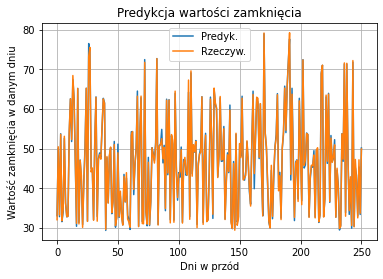

In [35]:
plt.plot(predict)
plt.plot(y_test)
plt.grid(True)
plt.legend(["Predyk.", "Rzeczyw."])
plt.xlabel("Dni w przód")
plt.ylabel("Wartość zamknięcia w danym dniu")
plt.title("Predykcja wartości zamknięcia")
plt.show()

In [36]:
print(np.mean(abs(y_test-predict))) #blad bezwględny
print(np.mean(abs(y_test-predict)/y_test)) #blad wzgledny

13.6511915823462
0.3084618572365247
